In [3]:
%pip install requests beautifulsoup4
import requests
import pprint
import json
from datetime import date, datetime

from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# URL = "https://news.ycombinator.com/"
# resp = requests.get(URL,
#                     # params={"day": datetime.today().date(), "p": 1})
#                     params={"day":"2023-05-02"})
# print(resp.json)
# soup = BeautifulSoup(resp.text, 'html.parser')
# rows = soup.find_all('tr', class_='athing')

In [ ]:
cols = "id date rank title url points comments".split()
df = pd.DataFrame(columns=cols,)

def get_posts_for_date(datestring):
    URL = "https://news.ycombinator.com"
    headers = {
        'user-agent': 'Mozilla/5.0',
        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
    }
    resp = requests.get(URL, headers=headers, params={"day": datestring})
    soup = BeautifulSoup(resp.text, 'html.parser')
    rows = soup.find_all('tr', class_='athing')
    for row in rows:
        id = int(row['id'])
        rank = int(row.find('span',class_="rank").text[:-1])
        title_element = row.find("span", class_='titleline')
        title = title_element.text if title_element else ''
        url = title_element.a["href"] if "https" in title_element.a["href"] else ''
        
        next_row = row.find_next_sibling('tr')
        subline = next_row.find("span", class_="subline")
        if not subline:
            continue
        else:
            subline = subline.text.split()
        if "points" in subline:
            points = int(subline[subline.index("points")-1]) 
        else:
            points = 0
        comments = ""
        if "comments" in subline:
            comments = int(subline[subline.index("comments")-1])
        else:
            points = 0

        value = [id, datestring, rank, title, url, points, comments]
        df.loc[len(df)] = value
    return df
    

from datetime import date
from time import sleep

# for d in range(1,31):
#     date_df = pd.DataFrame()
#     for p in range(1,3):
#         datestring = date(2023,5,d).isoformat()
#         date_df = get_posts_for_date(datestring, p)
#         # pd.concat([
#         #     date_df, get_posts_for_date(datestring, p)], axis=0)
#     date_df.to_csv(f"posts-{datestring}.csv")



date_df = get_posts_for_date("2023-04-01")
date_df

In [ ]:
df[["viewed","liked"]] = 0
# df.to_csv("data.csv")
df

# EDA (proper version!!!)

In [2]:
import pandas as pd

# read from data.csv
df = pd.read_csv("data.csv", index_col="id")
# df = df.drop(labels = ["Unnamed: 0"], axis=1)
# df[["viewed", "liked"]] = 0
# df.to_csv("data.csv.bak")
df

,date,rank,title,url,points,comments,viewed,liked
id,,,,,,,,
36153237,2023-05-01,1,Learn x86-64 assembly by writing a GUI from sc...,https://gaultier.github.io/blog/x11_x64.html,29,5.0,1,0
36152014,2023-05-01,2,Ask HN: Who is hiring? (June 2023),NaN,70,60.0,0,0
36149462,2023-05-01,3,I think Zig is hard but worth it (ratfactor.com),NaN,232,136.0,1,0
36140128,2023-05-01,4,The unsung hero of the Apple Watch is its hidd...,https://www.theverge.com/23743095/apple-watch-...,120,73.0,0,0
36151225,2023-05-01,5,Show HN: StonksGPT – A Natural Language search...,https://stonks.news/gpt,65,27.0,1,0
...,...,...,...,...,...,...,...,...
36151286,2023-05-30,26,Zuckerberg unveils Meta’s newest VR headset da...,https://www.cnbc.com/2023/06/01/meta-quest-3-u...,57,50.0,0,0
36151132,2023-05-30,27,People living near former atomic weapon plant ...,https://pubmed.ncbi.nlm.nih.gov/14738272/,61,17.0,0,0
36149690,2023-05-30,28,Maryland License Plates Now Inadvertently Adve...,https://www.vice.com/en/article/4a3xe9/marylan...,171,86.0,0,0


In [3]:
# remove duplicates
df.sort_values(by=["date"])
df = df.drop_duplicates(subset=["title"])
df

,date,rank,title,url,points,comments,viewed,liked
id,,,,,,,,
36153237,2023-05-01,1,Learn x86-64 assembly by writing a GUI from sc...,https://gaultier.github.io/blog/x11_x64.html,29,5.0,1,0
36152014,2023-05-01,2,Ask HN: Who is hiring? (June 2023),NaN,70,60.0,0,0
36149462,2023-05-01,3,I think Zig is hard but worth it (ratfactor.com),NaN,232,136.0,1,0
36140128,2023-05-01,4,The unsung hero of the Apple Watch is its hidd...,https://www.theverge.com/23743095/apple-watch-...,120,73.0,0,0
36151225,2023-05-01,5,Show HN: StonksGPT – A Natural Language search...,https://stonks.news/gpt,65,27.0,1,0
36152510,2023-05-01,6,Measuring the productivity impact of generativ...,https://www.nber.org/digest/measuring-producti...,60,59.0,1,0
36148807,2023-05-01,7,"Show HN: I made CSS Pro, a re-imagined Devtool...",https://csspro.com,305,172.0,0,0
36151140,2023-05-01,8,I went down the rabbit hole of buying GitHub S...,https://the-guild.dev/blog/judging-open-source...,194,115.0,1,0
36152222,2023-05-01,9,Show HN: Discipline.io – Make binding commitme...,https://discipline.io/,18,14.0,0,0


In [4]:
display(df.info())
display(df["viewed"].value_counts())
display(df["liked"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 36153237 to 36149375
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      29 non-null     object 
 1   rank      29 non-null     int64  
 2   title     29 non-null     object 
 3   url       27 non-null     object 
 4   points    29 non-null     int64  
 5   comments  27 non-null     float64
 6   viewed    29 non-null     int64  
 7   liked     29 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 2.0+ KB


None

viewed
0    20
1     9
Name: count, dtype: int64

liked
0    29
Name: count, dtype: int64

In [5]:
# set -999 points to 0
df.loc[df["points"] == -999,"points"] = 0

# set NaN url, comments values
df.loc[df["url"].isna(), "url"] = "#"
df.loc[df["comments"].isna(), "comments"] = 0

df.head()


,date,rank,title,url,points,comments,viewed,liked
id,,,,,,,,
36153237,2023-05-01,1,Learn x86-64 assembly by writing a GUI from sc...,https://gaultier.github.io/blog/x11_x64.html,29,5.0,1,0
36152014,2023-05-01,2,Ask HN: Who is hiring? (June 2023),#,70,60.0,0,0
36149462,2023-05-01,3,I think Zig is hard but worth it (ratfactor.com),#,232,136.0,1,0
36140128,2023-05-01,4,The unsung hero of the Apple Watch is its hidd...,https://www.theverge.com/23743095/apple-watch-...,120,73.0,0,0
36151225,2023-05-01,5,Show HN: StonksGPT – A Natural Language search...,https://stonks.news/gpt,65,27.0,1,0


array([[<AxesSubplot:title={'center':'points'}>]], dtype=object)

,points
count,29.000000
mean,100.034483
std,88.343681
min,0.000000
25%,37.000000
50%,66.000000
75%,130.000000
max,305.000000


array([[<AxesSubplot:title={'center':'comments'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'viewed'}>]], dtype=object)

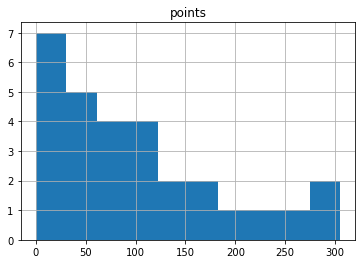

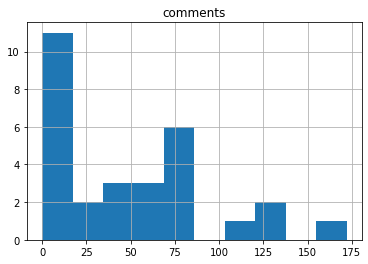

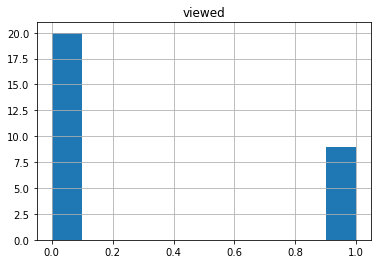

In [6]:
"""
point distribution is more on 0 side.
certainly a fair amount of distribution on 300+ side. 
"""
display(df[["points"]].hist())
display(df[["points"]].describe())
display(df[["comments"]].hist())
display(df[["viewed"]].hist())

# Feature extraction, text preprocessing before BERT.

In [7]:
# features to use
features_df = df[["title","points","comments","viewed"]]
features_df.head()

,title,points,comments,viewed
id,,,,
36153237,Learn x86-64 assembly by writing a GUI from sc...,29,5.0,1
36152014,Ask HN: Who is hiring? (June 2023),70,60.0,0
36149462,I think Zig is hard but worth it (ratfactor.com),232,136.0,1
36140128,The unsung hero of the Apple Watch is its hidd...,120,73.0,0
36151225,Show HN: StonksGPT – A Natural Language search...,65,27.0,1


In [8]:
# # scale integer values to 0-1
# from sklearn.preprocessing import MinMaxScaler

# features_df.loc[:,"points"] = MinMaxScaler().fit_transform(features_df[["points"]])
# features_df.loc[:,"comments"] = MinMaxScaler().fit_transform(features_df[["points"]])
# features_df.head()

In [9]:
# text preprocessing, tokenization
## maybe this can be handled in the modeling stage?
## or just use some basic stopwords and punctuation stuff?

# features_df.to_csv("features.csv")

## sample model

In [10]:
from sklearn.model_selection import train_test_split

X = features_df[["title","points","comments"]]
y = features_df[["viewed"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42)
X_train.head(), y_train.head()

(                                                      title  points  comments
 id                                                                           
 36146905  Lost John Coltrane recording, from experimenta...     260      43.0
 36152014                 Ask HN: Who is hiring? (June 2023)      70      60.0
 36151225  Show HN: StonksGPT – A Natural Language search...      65      27.0
 36152510  Measuring the productivity impact of generativ...      60      59.0
 36149462   I think Zig is hard but worth it (ratfactor.com)     232     136.0,
           viewed
 id              
 36146905       0
 36152014       0
 36151225       1
 36152510       1
 36149462       1)

In [11]:
X_train

,title,points,comments
id,,,
36146905,"Lost John Coltrane recording, from experimenta...",260,43.0
36152014,Ask HN: Who is hiring? (June 2023),70,60.0
36151225,Show HN: StonksGPT – A Natural Language search...,65,27.0
36152510,Measuring the productivity impact of generativ...,60,59.0
36149462,I think Zig is hard but worth it (ratfactor.com),232,136.0
36153496,The Meta Quest 3 is a $499 mixed reality heads...,8,2.0
36140128,The unsung hero of the Apple Watch is its hidd...,120,73.0
36151286,Zuckerberg unveils Meta’s newest VR headset da...,57,49.0
36151132,People living near former atomic weapon plant ...,61,17.0


In [12]:
y_train

,viewed
id,
36146905,0
36152014,0
36151225,1
36152510,1
36149462,1
36153496,0
36140128,0
36151286,0
36151132,0


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import numpy as np

# Define the column names for feature scaling and text processing
numeric_cols = ['points', 'comments']
text_col = 'title'

# Create a scaler for numeric columns
scaler = MinMaxScaler()

# Create a tokenizer and load the BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Define the custom transformer for text data
class TextTransformer:
    def __init__(self, tokenizer, model):
        self.tokenizer = tokenizer
        self.model = model

    def transform(self, X):
        encoded_inputs = self.tokenizer.batch_encode_plus(
            X,
            add_special_tokens=True,
            padding='longest',
            truncation=True,
            return_tensors='np'
        )
        input_ids = tf.convert_to_tensor(encoded_inputs['input_ids'], dtype=tf.int32)
        attention_mask = tf.convert_to_tensor(encoded_inputs['attention_mask'], dtype=tf.int32)
        embeddings = self.model(input_ids, attention_mask=attention_mask)[0]
        return tf.reduce_mean(embeddings, axis=1)

    def fit(self, X, y=None):
        return self

2023-06-04 09:34:26.566896: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-04 09:34:26.617259: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-04 09:34:26.618108: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-04 09:34:27.495356: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a B

In [14]:
# transformer = TextTransformer(tokenizer, bert_model)
# transformed_data = transformer.transform(["This is the first sentence.", "Another sentence."])
# transformed_data


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import numpy as np

# Define the column names for feature scaling and text processing
numeric_cols = ['points', 'comments']
text_col = 'title'

# Create a scaler for numeric columns
scaler = MinMaxScaler()

# Create a tokenizer and load the BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Define the custom transformer for text data
class TextTransformer:
    def __init__(self, tokenizer, model):
        self.tokenizer = tokenizer
        self.model = model

    def transform(self, X):
        encoded_inputs = self.tokenizer.batch_encode_plus(
            X,
            add_special_tokens=True,
            padding='longest',
            truncation=True,
            return_tensors='tf'  # Return tensors as TensorFlow tensors
        )
        input_ids = encoded_inputs['input_ids']
        attention_mask = encoded_inputs['attention_mask']
        embeddings = self.model(input_ids, attention_mask=attention_mask)[0]
        return tf.reduce_mean(embeddings, axis=1)

    def fit(self, X, y=None):
        return self

# # Define the column transformer for different types of data
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('numeric', scaler, numeric_cols),  # Feature scaling for numeric columns
#         ('text', TextTransformer(tokenizer, bert_model), text_col)  # Text processing with TextTransformer
#     ])

# Define the column transformer for different types of data
from sklearn.compose import make_column_transformer
preprocessor = make_column_transformer(
    (scaler, numeric_cols),  # Feature scaling for numeric columns
    (TextTransformer(tokenizer, bert_model), text_col)  # Text processing with TextTransformer
)


# Define your final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression())  # Classifier step (or any other estimator)
])

# print(X_train[numeric_cols].to_numpy())
X_train_text = [s.split() for s in X_train["title"]]
print(X_train_text)

# Fit the pipeline to your training data
pipeline.fit({'numeric': X_train[numeric_cols].to_numpy(), 'text': X_train_text}, y_train)

# Make predictions on test data
# y_pred = pipeline.predict({'numeric': X_test[numeric_cols], 'text': X_test[text_col]})


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


[['Lost', 'John', 'Coltrane', 'recording,', 'from', 'experimental', 'phase', 'with', 'Eric', 'Dolphy,', 'emerges', '(npr.org)'], ['Ask', 'HN:', 'Who', 'is', 'hiring?', '(June', '2023)'], ['Show', 'HN:', 'StonksGPT', '–', 'A', 'Natural', 'Language', 'search', 'tool', 'for', 'Stocks', 'and', 'Finance', 'data', '(stonks.news)'], ['Measuring', 'the', 'productivity', 'impact', 'of', 'generative', 'AI', '(nber.org)'], ['I', 'think', 'Zig', 'is', 'hard', 'but', 'worth', 'it', '(ratfactor.com)'], ['The', 'Meta', 'Quest', '3', 'is', 'a', '$499', 'mixed', 'reality', 'headset', 'with', 'full-color', 'passthrough', '(engadget.com)'], ['The', 'unsung', 'hero', 'of', 'the', 'Apple', 'Watch', 'is', 'its', 'hidden', 'buttons', '(theverge.com)'], ['Zuckerberg', 'unveils', 'Meta’s', 'newest', 'VR', 'headset', 'days', 'before', 'Apple', 'reveals', 'its', 'own', '(cnbc.com)'], ['People', 'living', 'near', 'former', 'atomic', 'weapon', 'plant', 'in', 'WA', 'have', 'increased', 'cancer', 'rates', '(nih.gov)

ValueError: Expected 2D array, got scalar array instead:
array={'numeric': array([[260.,  43.],
       [ 70.,  60.],
       [ 65.,  27.],
       [ 60.,  59.],
       [232., 136.],
       [  8.,   2.],
       [120.,  73.],
       [ 57.,  49.],
       [ 61.,  17.],
       [ 44.,  15.],
       [130.,  82.],
       [  0.,   0.],
       [194., 115.],
       [ 92.,  68.],
       [  0.,   0.],
       [ 14.,   9.],
       [305., 172.]]), 'text': [['Lost', 'John', 'Coltrane', 'recording,', 'from', 'experimental', 'phase', 'with', 'Eric', 'Dolphy,', 'emerges', '(npr.org)'], ['Ask', 'HN:', 'Who', 'is', 'hiring?', '(June', '2023)'], ['Show', 'HN:', 'StonksGPT', '–', 'A', 'Natural', 'Language', 'search', 'tool', 'for', 'Stocks', 'and', 'Finance', 'data', '(stonks.news)'], ['Measuring', 'the', 'productivity', 'impact', 'of', 'generative', 'AI', '(nber.org)'], ['I', 'think', 'Zig', 'is', 'hard', 'but', 'worth', 'it', '(ratfactor.com)'], ['The', 'Meta', 'Quest', '3', 'is', 'a', '$499', 'mixed', 'reality', 'headset', 'with', 'full-color', 'passthrough', '(engadget.com)'], ['The', 'unsung', 'hero', 'of', 'the', 'Apple', 'Watch', 'is', 'its', 'hidden', 'buttons', '(theverge.com)'], ['Zuckerberg', 'unveils', 'Meta’s', 'newest', 'VR', 'headset', 'days', 'before', 'Apple', 'reveals', 'its', 'own', '(cnbc.com)'], ['People', 'living', 'near', 'former', 'atomic', 'weapon', 'plant', 'in', 'WA', 'have', 'increased', 'cancer', 'rates', '(nih.gov)'], ['Show', 'HN:', 'Word2vec', 'Algorithm', 'in', '~100sloc', 'with', 'NumPy', '(github.com/josephsboyle)'], ['EPYC', '7002', 'CPUs', 'may', 'hang', 'after', '1042', 'days', 'of', 'uptime', '(reddit.com)'], ['Using', 'Adapt', 'and', 'Beam', 'for', 'Effective', 'Data', 'Modeling', '(airbyte.com)'], ['I', 'went', 'down', 'the', 'rabbit', 'hole', 'of', 'buying', 'GitHub', 'Stars,', 'so', 'you', "won't", 'have', 'to', '(the-guild.dev)'], ['Two', 'Men', 'Got', 'Jobs', 'at', 'Amazon', 'Just', 'to', 'Steal', 'Copies', 'of', 'Zelda', '(kotaku.com)'], ['Explore', 'Australian', 'Fossils', 'in', '3D', '(flinders.edu.au)'], ['Show', 'HN:', 'TodoBot', 'is', 'an', 'AI', 'coach', 'that', 'helps', 'you', 'write', 'a', 'better', 'todo', 'list', '(todobot.ai)'], ['Show', 'HN:', 'I', 'made', 'CSS', 'Pro,', 'a', 're-imagined', 'Devtools', 'for', 'web', 'design', '(csspro.com)']]}.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Define the column transformer for different types of data
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', scaler, numeric_cols),  # Feature scaling for numeric columns
        ('text', Pipeline([
            ('tokenizer', TextTransformer(tokenizer, bert_model))  # Text processing with BERT model
        ]), text_col)  # Text processing for 'title' column
    ])


# Define your final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression())  # Classifier step (or any other estimator)
])

# Convert your training data to the appropriate data types
X_train_text = X_train['title'].astype(str)
X_train_numeric = X_train[['points', 'comments']].values.astype(float).reshape(-1, 2)

# Fit the pipeline to your training data
pipeline.fit({'text': X_train_text, 'numeric': X_train_numeric}, y_train)

# Convert your test data to the appropriate data types
X_test_text = X_test['title'].astype(str)
X_test_numeric = X_test[['points', 'comments']].values.astype(float).reshape(-1, 2)

# Make predictions on test data
y_pred = pipeline.predict({'text': X_test_text, 'numeric': X_test_numeric})


ValueError: Expected 2D array, got scalar array instead:
array={'text': id
36146905    Lost John Coltrane recording, from experimenta...
36152014                   Ask HN: Who is hiring? (June 2023)
36151225    Show HN: StonksGPT – A Natural Language search...
36152510    Measuring the productivity impact of generativ...
36149462     I think Zig is hard but worth it (ratfactor.com)
36153496    The Meta Quest 3 is a $499 mixed reality heads...
36140128    The unsung hero of the Apple Watch is its hidd...
36151286    Zuckerberg unveils Meta’s newest VR headset da...
36151132    People living near former atomic weapon plant ...
36149620    Show HN: Word2vec Algorithm in ~100sloc with N...
36149375    EPYC 7002 CPUs may hang after 1042 days of upt...
36151441    Using Adapt and Beam for Effective Data Modeli...
36151140    I went down the rabbit hole of buying GitHub S...
36151417    Two Men Got Jobs at Amazon Just to Steal Copie...
36150503    Explore Australian Fossils in 3D (flinders.edu...
36151056    Show HN: TodoBot is an AI coach that helps you...
36148807    Show HN: I made CSS Pro, a re-imagined Devtool...
Name: title, dtype: object, 'numeric': array([[260.,  43.],
       [ 70.,  60.],
       [ 65.,  27.],
       [ 60.,  59.],
       [232., 136.],
       [  8.,   2.],
       [120.,  73.],
       [ 57.,  49.],
       [ 61.,  17.],
       [ 44.,  15.],
       [130.,  82.],
       [  0.,   0.],
       [194., 115.],
       [ 92.,  68.],
       [  0.,   0.],
       [ 14.,   9.],
       [305., 172.]])}.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.